In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
import seaborn as sns
%matplotlib inline

In [2]:
import plotly as py


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df=pd.read_csv('/content/drive/MyDrive/Womens Clothing E-Commerce Reviews.csv.zip')

In [6]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [7]:
#removing unnecessary columns
df.drop(labels=['Unnamed: 0', 'Clothing ID', 'Title'], axis=1, inplace=True)


In [8]:
df.head()

,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,34,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [9]:
df.describe()

,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000
mean,43.198544,4.196032,0.822362,2.535936
std,12.279544,1.110031,0.382216,5.702202
min,18.000000,1.000000,0.000000,0.000000
25%,34.000000,4.000000,1.000000,0.000000
50%,41.000000,5.000000,1.000000,1.000000
75%,52.000000,5.000000,1.000000,3.000000
max,99.000000,5.000000,1.000000,122.000000


In [10]:
#checking null values
df.isnull().sum()

Age                          0
Review Text                845
Rating                       0
Recommended IND              0
Positive Feedback Count      0
Division Name               14
Department Name             14
Class Name                  14
dtype: int64

In [11]:
#dropping null values
df.dropna(subset=['Review Text', 'Division Name'], inplace=True)

In [12]:
df.isnull().sum()

Age                        0
Review Text                0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
dtype: int64

In [13]:
#Preprocessing the data
def preprocess(ReviewText):
    ReviewText = ReviewText.str.replace("(<br/>)", "")
    ReviewText = ReviewText.str.replace('(<a).*(>).*(</a>)', '')
    ReviewText = ReviewText.str.replace('(&amp)', '')
    ReviewText = ReviewText.str.replace('(&gt)', '')
    ReviewText = ReviewText.str.replace('(&lt)', '')
    ReviewText = ReviewText.str.replace('(\xa0)', ' ')  
    return ReviewText

df['Review Text'] = preprocess(df['Review Text'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

The default value of regex will change from True to False in a future version.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning:

The default value of regex will change from True to False in a future version.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning:

The default value of regex will change from True to False in a future version.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning:

The default value of regex will change from True to False in a future version.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning:

The default value of regex will change from True to False in a future version.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning:

The default value of regex will change from True to False in a future version.



*Using TextBlob to calculate sentiment polarity which lies in the range of [-1,1] where 1 means positive sentiment and -1 means a negative sentiment, 
and also calculating word counts and review length*

In [14]:
 df['Polarity'] = df['Review Text'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['word_count'] = df['Review Text'].apply(lambda x: len(str(x).split()))
df['review_len'] = df['Review Text'].apply(lambda x: len(str(x)))


In [15]:
cl = df.loc[df.Polarity == 1, ['Review Text']].sample(5).values
for c in cl:
    print(c[0])

The material is wonderful and the dress is lined. plenty of room in the bodice area for a 36d bust. will be wearing a lot this season.
This is a great blouse for all shapes!   you can wear it under a suit or with jeans!
If there ever was the perfect feminine dress, this would be it .
Beautiful dress! the pics online do not do any justice! i got compliments all day!
The print is awesome !


In [16]:
cl = df.loc[df.Polarity == 0, ['Review Text']].sample(5).values
for c in cl:
    print(c[0])

These shorts are divine. the fabric is sturdy and there is a weave of sparkle that i did not perceive from the picture.
I feel like an indian goddess in this dress! lots of swing to it!
Whimsical and elegant. fits a bit snug in rib cage, but that works well for me. i'm a 32c.
I look like a stuffed sausage in these pants and i even went up a size. for some reason, this fabric isn't working for me. i think it's the sheed combined with the stretch (or lack there of) of the fabric. i'll have to pass.
So much extra fabric. not something i would recommend buying online.


In [17]:
cl = df.loc[df.Polarity <= -0.7, ['Review Text']].sample(5).values
for c in cl:
    print(c[0])

What a disappointment and for the price, it's outrageous!
Received this product with a gaping hole in it. very disappointed in the quality and the quality control at the warehouse
Awful color, horribly wrinkled and just a mess...so disappointed
The button fell off when i took it out of the bag, and i noticed that all of the thread had unraveled. will be returning :-(
Cut out design, no seems or hems.
 very disappointed in retailer


## *Distribution of review sentiment polarity*

---



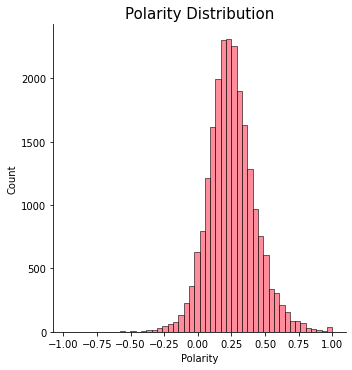

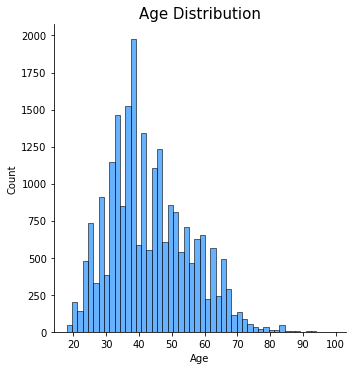

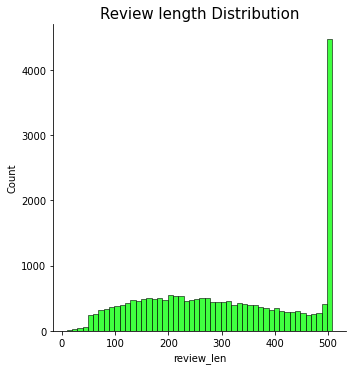

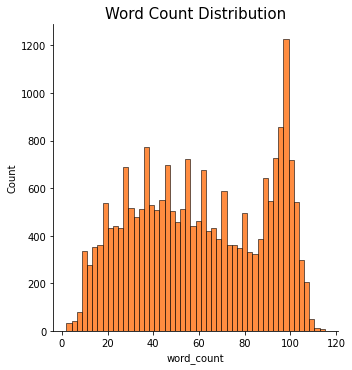

In [25]:
features = ['Polarity', 'Age', 'review_len', 'word_count']
titles = ['Polarity Distribution', 'Age Distribution', 'Review length Distribution', 'Word Count Distribution']
colors = ['#ff6678', '#3399ff', '#00ff00', '#ff6600']

for feature, title, color in zip(features, titles, colors): 
    sns.displot(x=df[feature], bins=50, color=color)
    plt.title(title, size=15)
    plt.xlabel(feature)
    plt.show()

*Vast majority of the sentiment polarity scores are greater than zero, means most of them are pretty positive.
Most reviewers are in their 30s to 40s.*

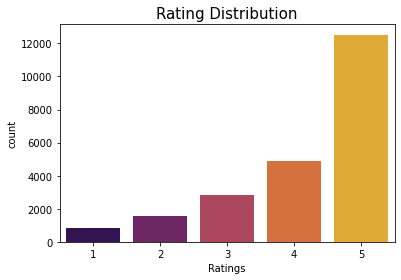

In [36]:
sns.countplot(x = 'Rating', palette='inferno', data=df)
plt.title('Rating Distribution', size=15)
plt.xlabel('Ratings')
plt.show()

*The ratings are in align with the polarity score, that is, most of the ratings are pretty high at 4 or 5 ranges.*

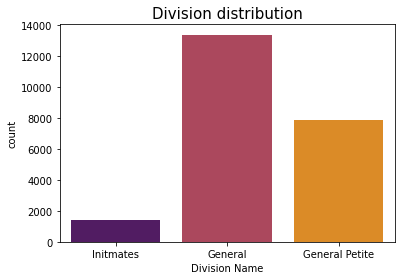

In [35]:
sns.countplot(x='Division Name', palette='inferno', data=df)
plt.title('Division distribution', size=15)
plt.show()

General division has the most number of reviews, and Initmates division has the least number of reviews.

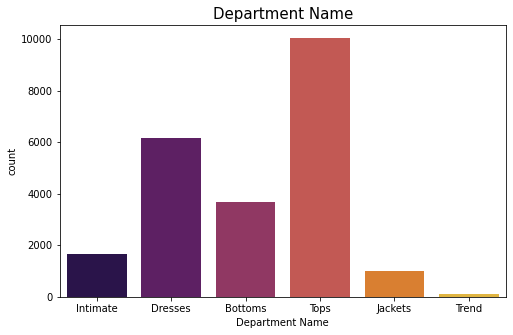

In [34]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Department Name', palette='inferno', data=df)
plt.title('Department Name', size=15)
plt.show()

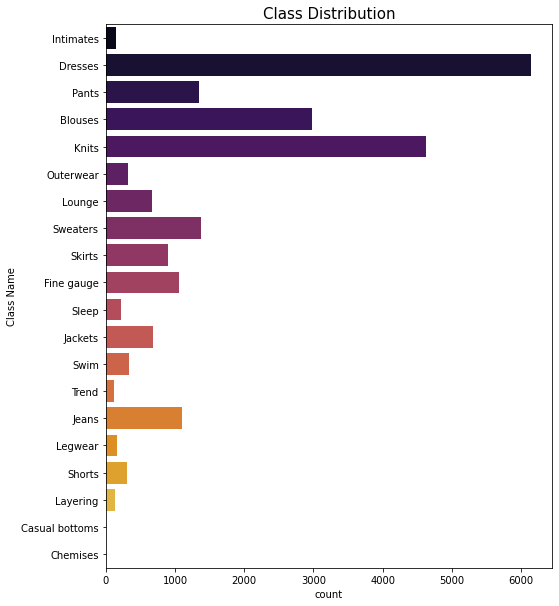

In [33]:
plt.figure(figsize=(8, 10))
sns.countplot(y='Class Name', palette='inferno', data=df)
plt.title('Class Distribution', size=15)
plt.show()

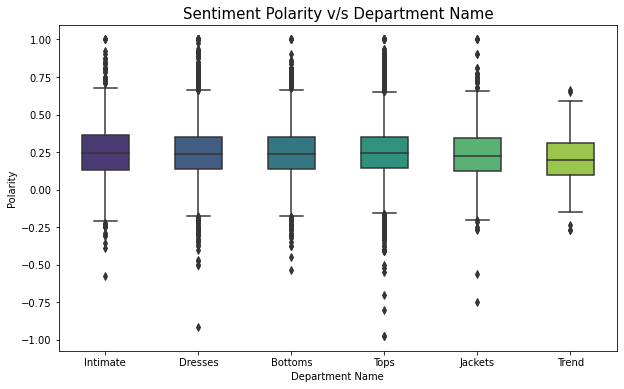

In [37]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Department Name', y='Polarity', width=0.5, palette='viridis', data=df)
plt.title('Sentiment Polarity v/s Department Name', size=15)
plt.show()

*The highest sentiment polarity score was achieved by all of the six departments except Trend department, and the lowest sentiment polarity score was collected by Tops department. And the Trend department has the lowest median polarity score. If you remember, the Trend department has the least number of reviews. This explains why it does not have as wide variety of score distribution as the other departments.*

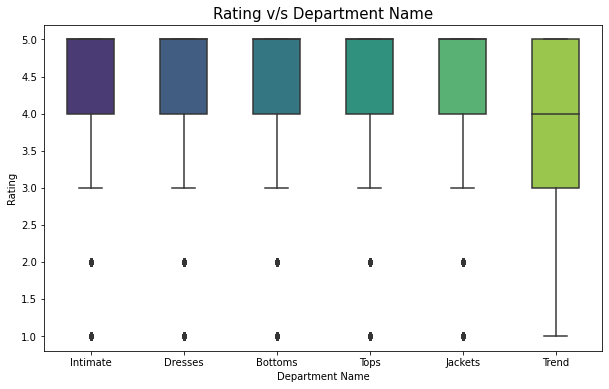

In [38]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Department Name', y='Rating', width=0.5, palette='viridis', data=df)
plt.title('Rating v/s Department Name', size=15)
plt.show()

*Except Trend department, all the other departments’ median rating were 5. Overall, the ratings are high and sentiment are positive in this review data set.*

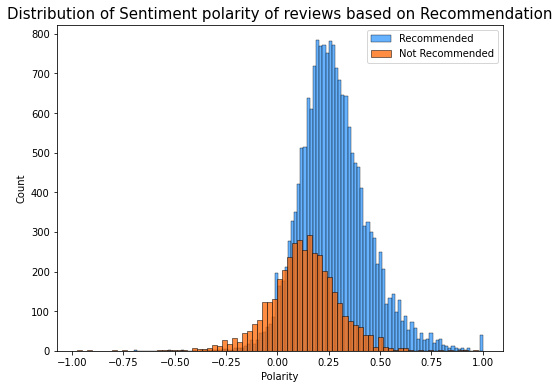

In [39]:
recommended = df.loc[df['Recommended IND'] == 1, 'Polarity']
not_recommended = df.loc[df['Recommended IND'] == 0, 'Polarity']

plt.figure(figsize=(8, 6))
sns.histplot(x=recommended, color=colors[1], label='Recommended')
sns.histplot(x=not_recommended, color=colors[3], label='Not Recommended')
plt.title('Distribution of Sentiment polarity of reviews based on Recommendation', size=15)
plt.legend()
plt.show()

*It is obvious that clothes that have higher polarity score are more likely to be recommended.*

<Figure size 576x576 with 0 Axes>

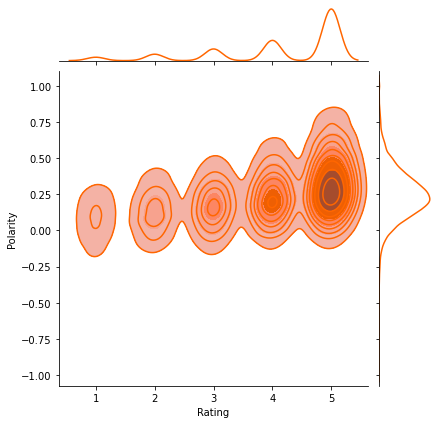

In [40]:
plt.figure(figsize=(8, 8))
g = sns.jointplot(x='Rating', y='Polarity', kind='kde', color=colors[3], data=df)
g.plot_joint(sns.kdeplot, fill=True, color=colors[3], zorder=0, levels=6)

plt.show()

<Figure size 720x576 with 0 Axes>

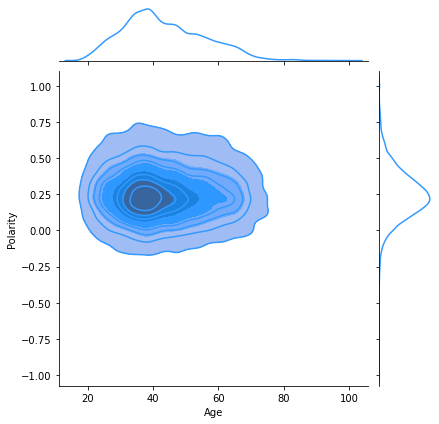

In [41]:
plt.figure(figsize=(10, 8))
g = sns.jointplot(x='Age', y='Polarity', kind='kde', color=colors[1], data=df)
g.plot_joint(sns.kdeplot, fill=True, color=colors[1], zorder=0, levels=6)
plt.show()

There were few people who were very positive or very negative. People who give neutral to positive reviews are more likely to be in their 30s. Probably people at these age are likely to be more active.